In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [5]:
# Charger les données
df = pd.read_csv("compositions-du-trafic-2.csv", sep=";")
df.head()

,année,site,tronçon,arrondissement,coordonnées,latitude,longitude,période,heure,catégories de véhicules,données,secteur
0,2016-01-01,Porte de Saint-Cloud,en direction de la Porte d'Auteuil,BP,"48.84165, 2.22163",48.84165,2.22163,MOYENNE DU 24 AU 26 NOVEMBRE 2016,08h-09h,Cars,13.000000,Boulevard Périphérique
1,2016-01-01,Porte de Saint-Cloud,en direction de la Porte d'Auteuil,BP,"48.84165, 2.22163",48.84165,2.22163,MOYENNE DU 24 AU 26 NOVEMBRE 2016,14h-15h,Véhicules Utilitaires,786.000000,Boulevard Périphérique
2,2016-01-01,Porte de Saint-Cloud,en direction de la Porte de Sèvres,BP,"48.84165, 2.22163",48.84165,2.22163,MOYENNE DU 24 AU 26 NOVEMBRE 2016,07h-08h,Taxis,125.666667,Boulevard Périphérique
3,2016-01-01,Porte de Saint-Cloud,en direction de la Porte de Sèvres,BP,"48.84165, 2.22163",48.84165,2.22163,MOYENNE DU 24 AU 26 NOVEMBRE 2016,08h-09h,Cars,5.333333,Boulevard Périphérique
4,2016-01-01,Porte de Saint-Cloud,en direction de la Porte de Sèvres,BP,"48.84165, 2.22163",48.84165,2.22163,MOYENNE DU 24 AU 26 NOVEMBRE 2016,10h-11h,Véhicules Utilitaires,960.666667,Boulevard Périphérique


In [6]:
# Convertir les colonnes utiles
df["année"] = pd.to_datetime(df["année"], errors='coerce').dt.year
df["données"] = pd.to_numeric(df["données"], errors='coerce')

In [7]:
# Trier les tranches horaires
heure_order = sorted(df["heure"].dropna().unique(), key=lambda x: int(x.split('h')[0]))
df["heure"] = pd.Categorical(df["heure"], categories=heure_order, ordered=True)

In [8]:
# Filtrer les catégories de véhicules pour exclure certains types
exclude_categories = ["Vélib's", "Vélos Personnels", "Trottinettes"]
df = df[~df["catégories de véhicules"].isin(exclude_categories)]
df

,année,site,tronçon,arrondissement,coordonnées,latitude,longitude,période,heure,catégories de véhicules,données,secteur
0,2016,Porte de Saint-Cloud,en direction de la Porte d'Auteuil,BP,"48.84165, 2.22163",48.84165,2.22163,MOYENNE DU 24 AU 26 NOVEMBRE 2016,08h-09h,Cars,13.000000,Boulevard Périphérique
1,2016,Porte de Saint-Cloud,en direction de la Porte d'Auteuil,BP,"48.84165, 2.22163",48.84165,2.22163,MOYENNE DU 24 AU 26 NOVEMBRE 2016,14h-15h,Véhicules Utilitaires,786.000000,Boulevard Périphérique
2,2016,Porte de Saint-Cloud,en direction de la Porte de Sèvres,BP,"48.84165, 2.22163",48.84165,2.22163,MOYENNE DU 24 AU 26 NOVEMBRE 2016,07h-08h,Taxis,125.666667,Boulevard Périphérique
3,2016,Porte de Saint-Cloud,en direction de la Porte de Sèvres,BP,"48.84165, 2.22163",48.84165,2.22163,MOYENNE DU 24 AU 26 NOVEMBRE 2016,08h-09h,Cars,5.333333,Boulevard Périphérique
4,2016,Porte de Saint-Cloud,en direction de la Porte de Sèvres,BP,"48.84165, 2.22163",48.84165,2.22163,MOYENNE DU 24 AU 26 NOVEMBRE 2016,10h-11h,Véhicules Utilitaires,960.666667,Boulevard Périphérique
...,...,...,...,...,...,...,...,...,...,...,...,...
2459,2014,Porte de Choisy,en direction de la Porte d'Italie,BP,"48.81735, 2.36685",48.81735,2.36685,MOYENNE DU 25 AU 27 NOVEMBRE 2014,08h-09h,Deux roues-motorisés,1232.000000,Boulevard Périphérique
2460,2014,Porte de Choisy,en direction de la Porte d'Ivry,BP,"48.81735, 2.36685",48.81735,2.36685,MOYENNE DU 25 AU 27 NOVEMBRE 2014,08h-09h,Deux roues-motorisés,1007.666667,Boulevard Périphérique
2461,2014,Porte de Choisy,en direction de la Porte d'Ivry,BP,"48.81735, 2.36685",48.81735,2.36685,MOYENNE DU 25 AU 27 NOVEMBRE 2014,10h-11h,Cars,19.666667,Boulevard Périphérique
2462,2014,Porte de Choisy,en direction de la Porte d'Ivry,BP,"48.81735, 2.36685",48.81735,2.36685,MOYENNE DU 25 AU 27 NOVEMBRE 2014,13h-14h,Véhicules Utilitaires,1286.333333,Boulevard Périphérique


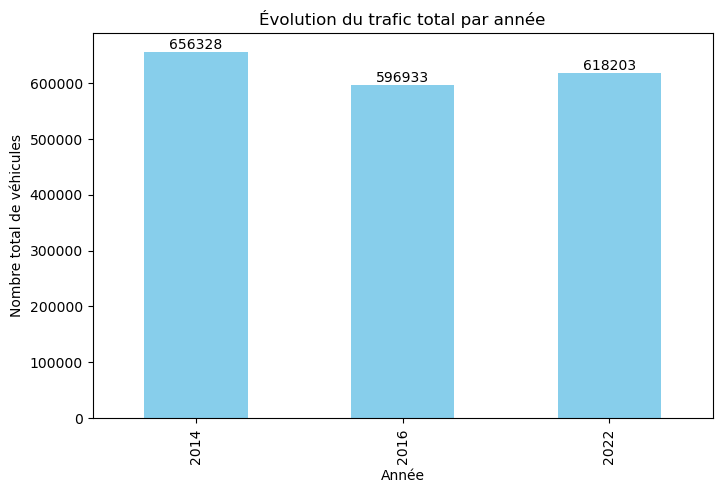

In [9]:
# 1. Évolution du trafic total par année
plt.figure(figsize=(8, 5))
ax = df.groupby("année")["données"].sum().plot(kind="bar", color="skyblue")
plt.title("Évolution du trafic total par année")
plt.ylabel("Nombre total de véhicules")
plt.xlabel("Année")

# Ajouter les valeurs au-dessus des barres
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

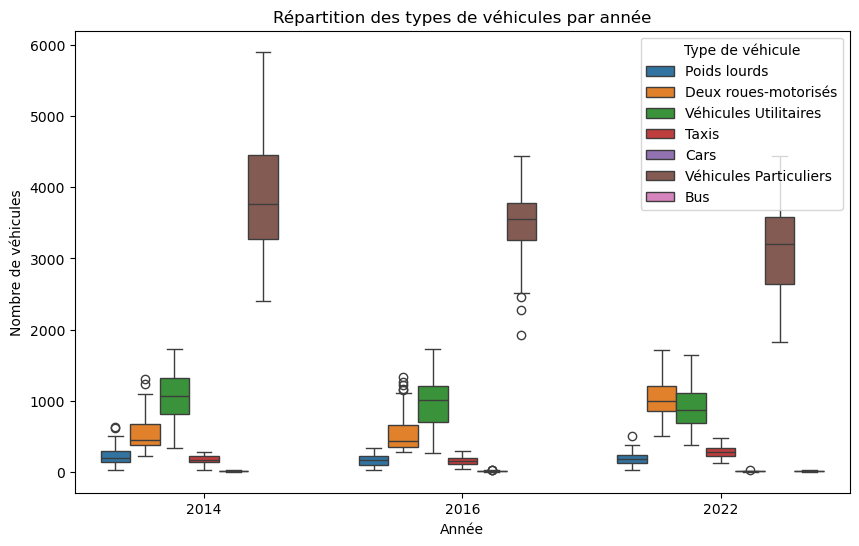

In [10]:
# 2. Répartition des types de véhicules
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="année", y="données", hue="catégories de véhicules")
plt.title("Répartition des types de véhicules par année")
plt.ylabel("Nombre de véhicules")
plt.xlabel("Année")
plt.legend(title="Type de véhicule")
plt.show()

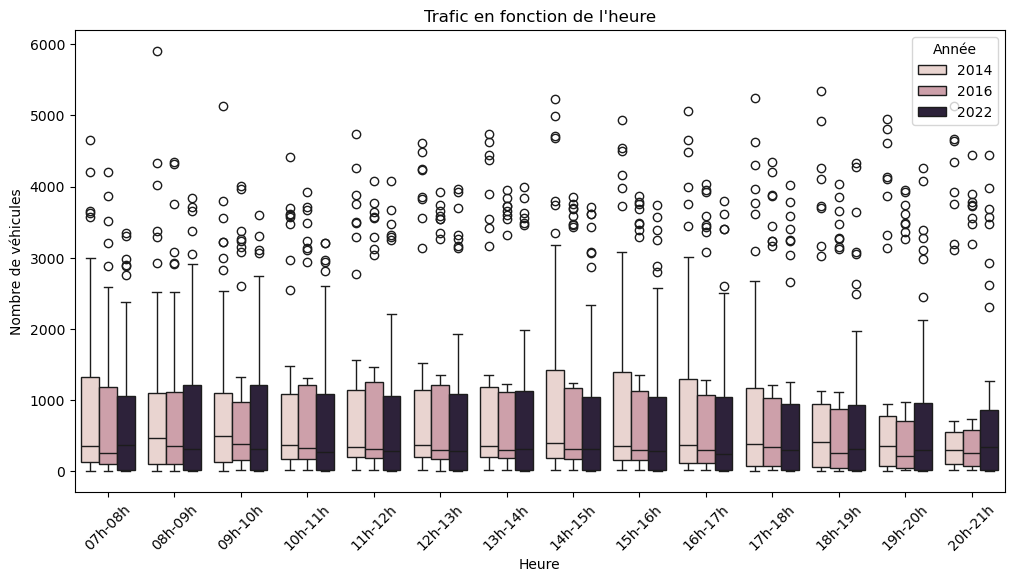

In [11]:
# 3.1 Trafic en fonction de l'heure
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="heure", y="données", hue="année")
plt.xticks(rotation=45)
plt.title("Trafic en fonction de l'heure")
plt.ylabel("Nombre de véhicules")
plt.xlabel("Heure")
plt.legend(title="Année")
plt.show()

In [12]:
# 3.2 Trafic en fonction de l'heure : Comparaison Somme vs Médiane (Plotly)
df_hourly_sum = df.groupby(["heure", "année"])["données"].sum().reset_index()
df_hourly_median = df.groupby(["heure", "année"])["données"].median().reset_index()

df_hourly_sum = df_hourly_sum[df_hourly_sum["année"] == 2022]
df_hourly_median = df_hourly_median[df_hourly_median["année"] == 2022]

fig = make_subplots(rows=1, cols=2, subplot_titles=("Somme totale des véhicules par heure", "Médiane des véhicules par heure"))

# Graphique pour la somme
total_fig = px.line(df_hourly_sum, x="heure", y="données", color="année", markers=True,
                    labels={"données": "Nombre total de véhicules", "heure": "Heure", "année": "Année"})
for trace in total_fig.data:
    fig.add_trace(trace, row=1, col=1)

# Graphique pour la médiane
median_fig = px.line(df_hourly_median, x="heure", y="données", color="année", markers=True,
                      labels={"données": "Nombre médian de véhicules", "heure": "Heure", "année": "Année"})
for trace in median_fig.data:
    fig.add_trace(trace, row=1, col=2)

fig.update_layout(title_text="Comparaison du trafic par tranche horaire", showlegend=True)
fig.show()

/var/folders/fm/kg5b8n7n4ns6lqqnwn6zhhkr0000gn/T/ipykernel_85593/486439948.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_hourly_sum = df.groupby(["heure", "année"])["données"].sum().reset_index()
/var/folders/fm/kg5b8n7n4ns6lqqnwn6zhhkr0000gn/T/ipykernel_85593/486439948.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_hourly_median = df.groupby(["heure", "année"])["données"].median().reset_index()


In [13]:
# 3.2 Trafic en fonction de l'heure : Comparaison Somme vs Médiane (Plotly) avec surbrillance des heures de covoiturage
df_hourly_sum = df.groupby(["heure", "année"])["données"].sum().reset_index()
df_hourly_median = df.groupby(["heure", "année"])["données"].median().reset_index()

fig = make_subplots(rows=1, cols=2, subplot_titles=("Somme totale des véhicules par heure", "Médiane des véhicules par heure"))

# Heures de la voie de covoiturage
heures_covoit = ["07h-08h", "08h-09h", "09h-10h", "10h-11h", "16h-17h", "17h-18h", "18h-19h", "19h-20h"]

# Graphique pour la somme
total_fig = px.line(df_hourly_sum, x="heure", y="données", color="année", markers=True,
                    labels={"données": "Nombre total de véhicules", "heure": "Heure", "année": "Année"})
for trace in total_fig.data:
    fig.add_trace(trace, row=1, col=1)

# Ajout de surbrillance des heures de covoiturage
fig.add_shape(
    type="rect", x0="07h-08h", x1="10h-11h", y0=35000, y1=df_hourly_sum["données"].max(),
    fillcolor="rgba(255, 165, 0, 0.2)", line=dict(width=0), row=1, col=1
)
fig.add_shape(
    type="rect", x0="16h-17h", x1="19h-20h", y0=35000, y1=df_hourly_sum["données"].max(),
    fillcolor="rgba(255, 165, 0, 0.2)", line=dict(width=0), row=1, col=1
)

# Graphique pour la médiane
median_fig = px.line(df_hourly_median, x="heure", y="données", color="année", markers=True,
                      labels={"données": "Nombre médian de véhicules", "heure": "Heure", "année": "Année"})
for trace in median_fig.data:
    fig.add_trace(trace, row=1, col=2)

# Ajout de surbrillance des heures de covoiturage
fig.add_shape(
    type="rect", x0="07h-08h", x1="10h-11h", y0=190, y1=df_hourly_median["données"].max(),
    fillcolor="rgba(255, 165, 0, 0.2)", line=dict(width=0), row=1, col=2
)
fig.add_shape(
    type="rect", x0="16h-17h", x1="19h-20h", y0=190, y1=df_hourly_median["données"].max(),
    fillcolor="rgba(255, 165, 0, 0.2)", line=dict(width=0), row=1, col=2
)

fig.update_layout(title_text="Comparaison du trafic par tranche horaire avec surbrillance des heures de covoiturage",
                  showlegend=True)
fig.show()

/var/folders/fm/kg5b8n7n4ns6lqqnwn6zhhkr0000gn/T/ipykernel_85593/2144851376.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/fm/kg5b8n7n4ns6lqqnwn6zhhkr0000gn/T/ipykernel_85593/2144851376.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



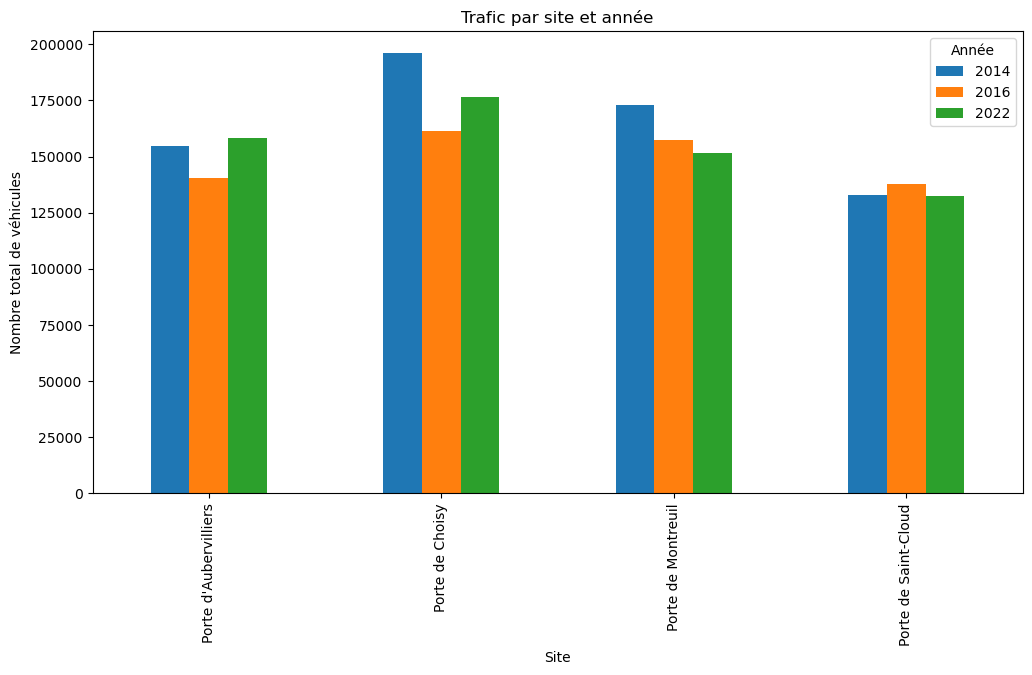

In [14]:
# 4. Trafic par site et tronçon
df_site = df.groupby(["site", "année"])["données"].sum().unstack()
df_site.plot(kind="bar", figsize=(12, 6))
plt.title("Trafic par site et année")
plt.ylabel("Nombre total de véhicules")
plt.xlabel("Site")
plt.xticks(rotation=90)
plt.legend(title="Année")
plt.show()

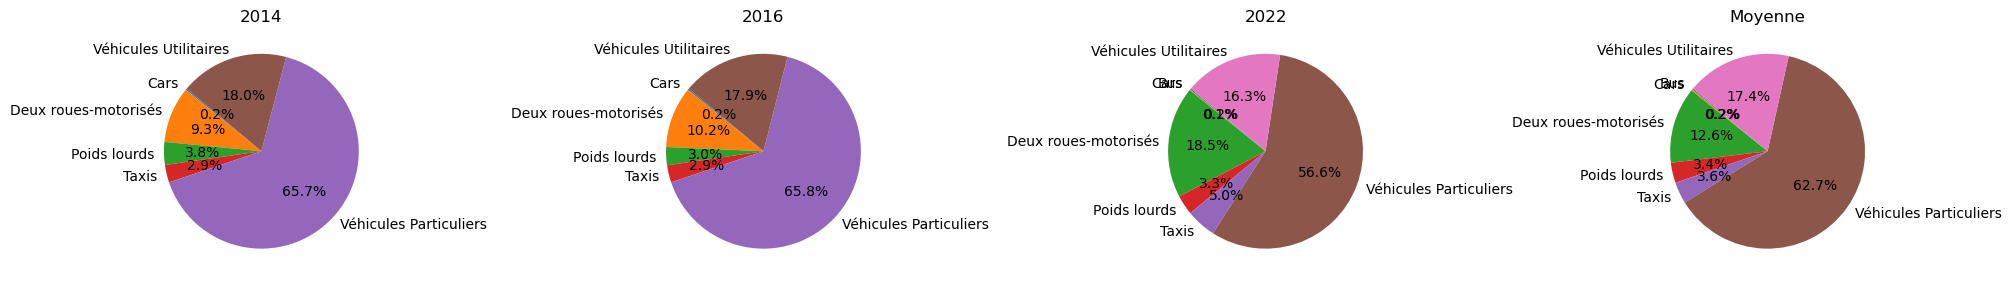

In [15]:
# 5. Diagrammes en rond du pourcentage de chaque type de véhicule par année dans une seule figure
annees = sorted(df["année"].unique())  # Tri des années dans l'ordre
n = len(annees) + 1  # +1 pour la moyenne
fig, axes = plt.subplots(1, n, figsize=(5*n, 5))

for i, annee in enumerate(annees):
    df_vehicules = df[df["année"] == annee].groupby("catégories de véhicules")["données"].sum()
    axes[i].pie(df_vehicules, labels=df_vehicules.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f"{annee}")

# 6. Diagramme en rond pour la moyenne des années
avg_vehicules = df.groupby("catégories de véhicules")["données"].mean()
axes[-1].pie(avg_vehicules, labels=avg_vehicules.index, autopct='%1.1f%%', startangle=140)
axes[-1].set_title("Moyenne")

plt.tight_layout()
plt.show()

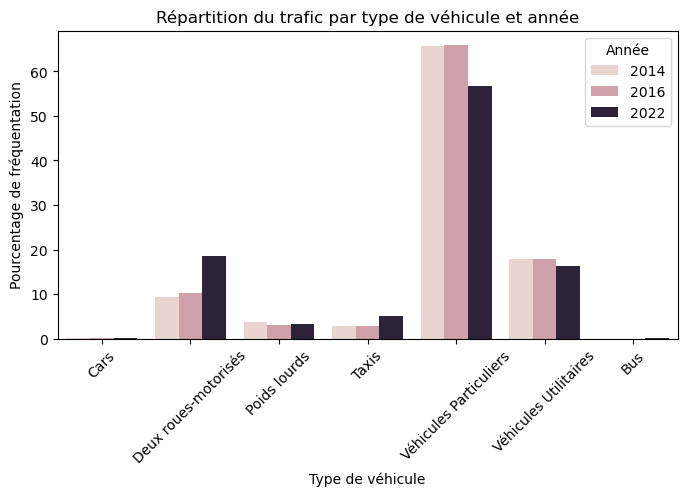

In [16]:
# 7. Diagramme en barres du pourcentage de fréquentation par type de véhicule et année
df_totals = df.groupby(["année", "catégories de véhicules"]) ["données"].sum().reset_index()
df_totals["Pourcentage"] = df_totals.groupby("année")["données"].transform(lambda x: 100 * x / x.sum())

plt.figure(figsize=(8, 4))
sns.barplot(data=df_totals, x="catégories de véhicules", y="Pourcentage", hue="année")
plt.xticks(rotation=45)
plt.ylabel("Pourcentage de fréquentation")
plt.xlabel("Type de véhicule")
plt.title("Répartition du trafic par type de véhicule et année")
plt.legend(title="Année")
plt.show()

In [17]:
df_totals

,année,catégories de véhicules,données,Pourcentage
0,2014,Cars,1561.666667,0.237940
1,2014,Deux roues-motorisés,61348.666667,9.347253
2,2014,Poids lourds,24807.666667,3.779765
3,2014,Taxis,19245.666667,2.932323
4,2014,Véhicules Particuliers,431349.333333,65.721577
5,2014,Véhicules Utilitaires,118015.333333,17.981143
6,2016,Cars,1421.333333,0.238106
7,2016,Deux roues-motorisés,60801.000000,10.185560
8,2016,Poids lourds,17923.333333,3.002569
9,2016,Taxis,17099.333333,2.864530


In [18]:
# 8. Répartition des véhicules admissibles vs non admissibles sur la voie de covoiturage
vehicules_autorises = ["Taxis", "Bus", "Véhicules Utilitaires", "Cars"]
df_eligible = df[df["catégories de véhicules"].isin(vehicules_autorises)].groupby("année")["données"].sum().reset_index()
df_non_eligible = df[~df["catégories de véhicules"].isin(vehicules_autorises)].groupby("année")["données"].sum().reset_index()
df_eligible["Type"] = "Véhicules Admissibles"
df_non_eligible["Type"] = "Véhicules Non Admissibles"
df_final = pd.concat([df_eligible, df_non_eligible])

fig_admissibles = px.bar(df_final, x="année", y="données", color="Type", barmode="stack",
                          labels={"données": "Nombre de véhicules", "année": "Année", "Type": "Catégorie"},
                          title="Répartition des véhicules admissibles vs non admissibles sur la voie de covoiturage")
fig_admissibles.show()

In [19]:
# 4. Répartition des véhicules admissibles vs non admissibles sur la voie de covoiturage (en pourcentage)
vehicules_autorises = ["Taxis", "Bus", "Véhicules Utilitaires", "Autres (incluant covoiturage)"]
df_eligible = df[df["catégories de véhicules"].isin(vehicules_autorises)].groupby("année")["données"].sum().reset_index()
df_non_eligible = df[~df["catégories de véhicules"].isin(vehicules_autorises)].groupby("année")["données"].sum().reset_index()

df_total = df.groupby("année")["données"].sum().reset_index()
df_eligible = df_eligible.merge(df_total, on="année", suffixes=("_eligible", "_total"))
df_non_eligible = df_non_eligible.merge(df_total, on="année", suffixes=("_non_eligible", "_total"))

df_eligible["Pourcentage"] = (df_eligible["données_eligible"] / df_eligible["données_total"]) * 100
df_non_eligible["Pourcentage"] = (df_non_eligible["données_non_eligible"] / df_non_eligible["données_total"]) * 100

df_eligible["Type"] = "Véhicules Admissibles"
df_non_eligible["Type"] = "Véhicules Non Admissibles"
df_final = pd.concat([df_eligible[["année", "Pourcentage", "Type"]], df_non_eligible[["année", "Pourcentage", "Type"]]])
df_final = df_final.dropna()  # Supprime les années avec NaN
df_final = df_final[df_final["année"].isin(df["année"].unique())]  # Garde seulement les années valides

fig_admissibles = px.bar(df_final, x="année", y="Pourcentage", color="Type", barmode="stack",
                          labels={"Pourcentage": "Pourcentage de véhicules", "année": "Année", "Type": "Catégorie"},
                          title="Répartition en pourcentage des véhicules admissibles vs non admissibles sur la voie de covoiturage")

fig_admissibles.update_xaxes(type="category")  # Force Plotly à traiter les années comme des catégories discrètes
fig_admissibles.show()
df_eligible



,année,données_eligible,données_total,Pourcentage,Type
0,2014,137261.000000,656328.333333,20.913466,Véhicules Admissibles
1,2016,123738.666667,596933.333333,20.729060,Véhicules Admissibles
2,2022,132626.666667,618203.666667,21.453555,Véhicules Admissibles
